<a href="https://colab.research.google.com/github/lohith1266/oasis-infobyte-intership-Data-Anallytics/blob/main/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🛒 CUSTOMER SEGMENTATION ANALYSIS
Dataset loaded successfully!
Dataset shape: (1000, 9)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB
None

First few rows:
   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         C

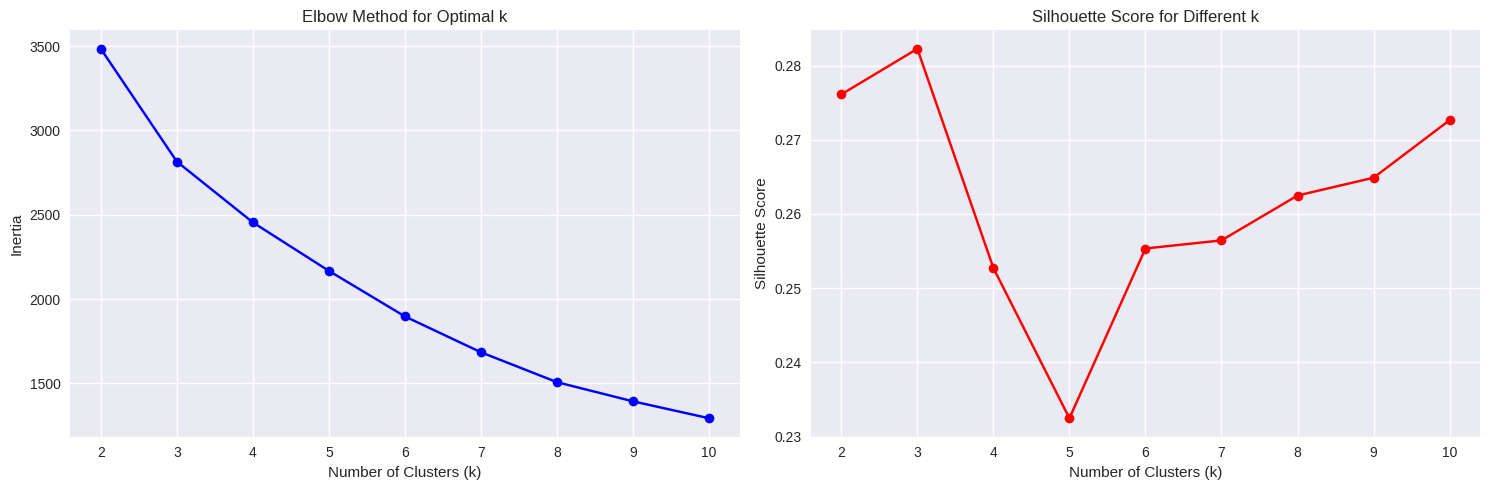

📊 Optimal number of clusters based on silhouette score: 3
✅ Customer segmentation completed with 3 clusters!

📈 Cluster Distribution:
-------------------------
Cluster 0: 184 customers (18.4%)
Cluster 1: 404 customers (40.4%)
Cluster 2: 412 customers (41.2%)

CREATING VISUALIZATIONS


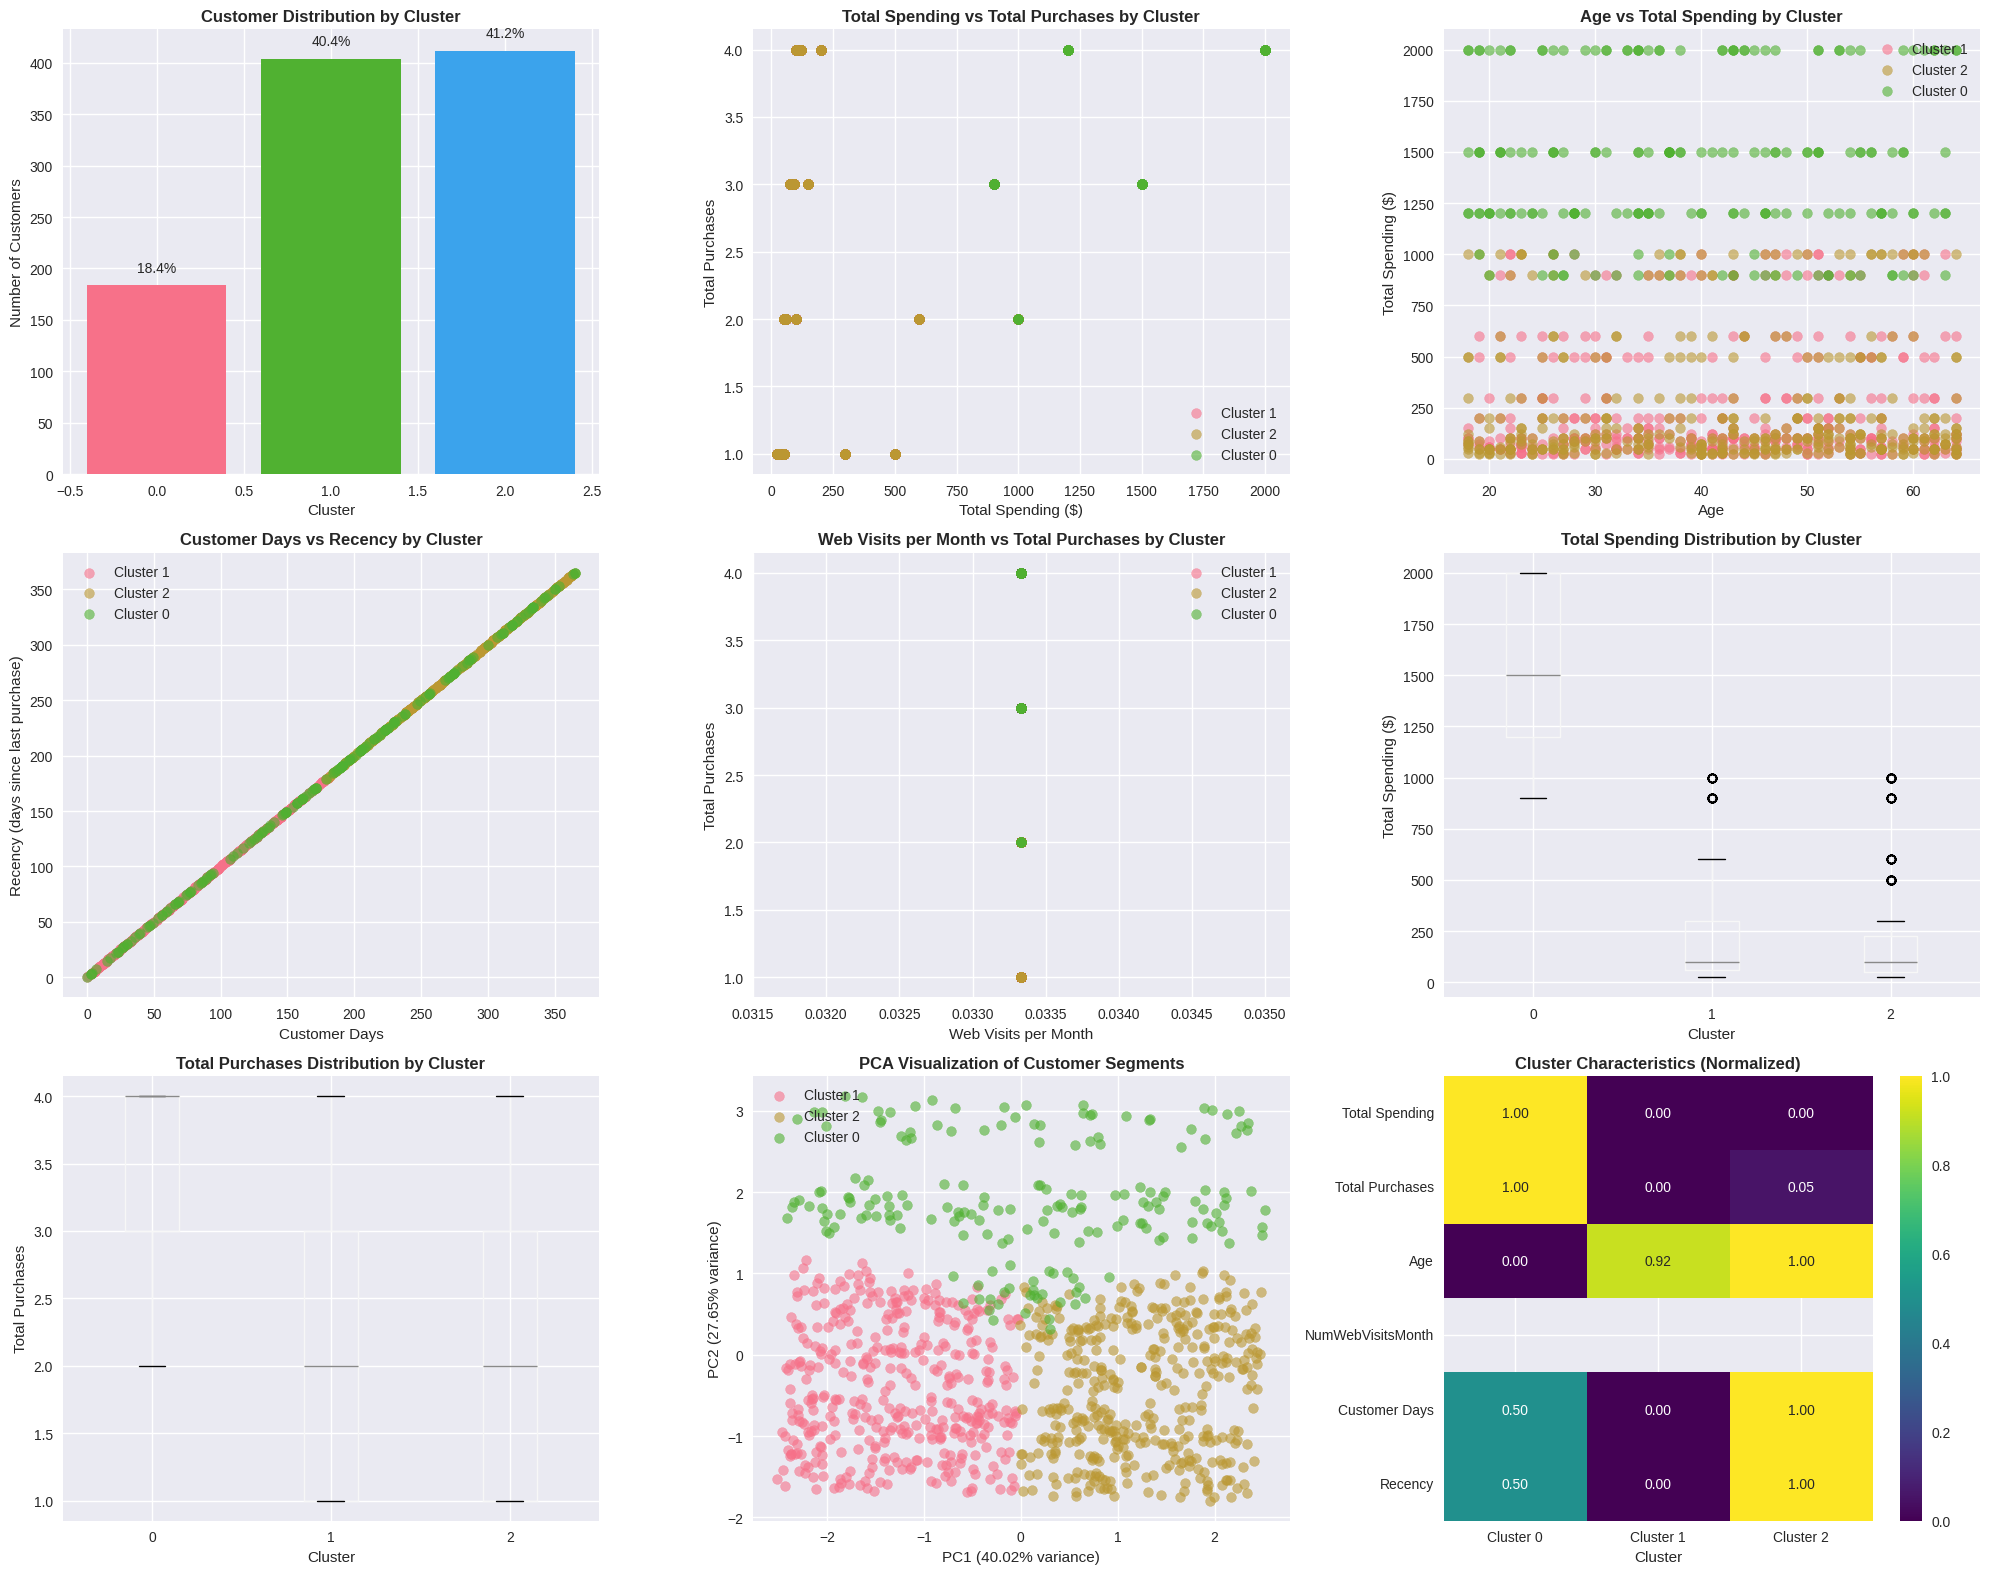

✅ All visualizations created successfully!

CUSTOMER SEGMENT ANALYSIS & INSIGHTS

🎯 CLUSTER 0 ANALYSIS
----------------------------------------
Size: 184 customers (18.4%)

📊 Key Characteristics:
  • Average Total Spending: $1,447.28
  • Average Total Purchases: 3.5
  • Average Age: 39 years
  • Average Customer Days: 181
  • Average Recency: 181 days
  • Average Web Visits/Month: 0.0

🎯 CLUSTER 1 ANALYSIS
----------------------------------------
Size: 404 customers (40.4%)

📊 Key Characteristics:
  • Average Total Spending: $230.98
  • Average Total Purchases: 2.3
  • Average Age: 42 years
  • Average Customer Days: 88
  • Average Recency: 88 days
  • Average Web Visits/Month: 0.0

🎯 CLUSTER 2 ANALYSIS
----------------------------------------
Size: 412 customers (41.2%)

📊 Key Characteristics:
  • Average Total Spending: $233.94
  • Average Total Purchases: 2.3
  • Average Age: 42 years
  • Average Customer Days: 275
  • Average Recency: 275 days
  • Average Web Visits/Month: 0.0

BUS

In [ ]:
# Customer Segmentation Analysis for E-commerce Company

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# ==========================================
# 1. DATA COLLECTION AND LOADING
# ==========================================

def load_customer_data(file_path):
    """Load and inspect the customer dataset"""

    print("🛒 CUSTOMER SEGMENTATION ANALYSIS")
    print("=" * 50)

    # Load the data
    # Make sure to upload 'customer_data.csv' to your Colab environment
    # and replace the file_path below if necessary.
    try:
        df = pd.read_csv(file_path)
        print("Dataset loaded successfully!")
        print(f"Dataset shape: {df.shape}")

        # Display basic information
        print("\nDataset Info:")
        print(df.info())

        print(f"\nFirst few rows:")
        print(df.head())

        return df
    except FileNotFoundError:
        print(f"Error: The file '{file_path}' was not found.")
        print("Please upload the 'customer_data.csv' file or provide the correct path.")
        return None

# ==========================================
# 2. DATA EXPLORATION AND CLEANING
# ==========================================

def explore_and_clean_data(df):
    """Comprehensive data exploration and cleaning"""
    if df is None:
        return None

    print("\n" + "="*50)
    print("DATA EXPLORATION AND CLEANING")
    print("="*50)

    # Check for missing values
    print("Missing Values Check:")
    missing_values = df.isnull().sum()
    print(missing_values[missing_values > 0])

    if missing_values.sum() == 0:
        print("✅ No missing values found!")
    else:
        # Handle missing values if any
        df = df.dropna()
        print(f"Rows after removing missing values: {df.shape[0]}")

    # Check for duplicates
    duplicates = df.duplicated().sum()
    print(f"\nDuplicate rows: {duplicates}")
    if duplicates > 0:
        df = df.drop_duplicates()
        print("Duplicates removed!")

    # Data types overview
    print(f"\nData Types:")
    print(df.dtypes.value_counts())

    # Statistical summary
    print(f"\nStatistical Summary:")
    print(df.describe().round(2))

    # Check for outliers in key numerical columns
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    print(f"\nNumerical columns: {len(numerical_cols)}")

    # Convert Date to datetime and extract Customer_Days
    df['Date'] = pd.to_datetime(df['Date'])
    latest_date = df['Date'].max()
    df['Customer_Days'] = (latest_date - df['Date']).dt.days

    return df

# ==========================================
# 3. DESCRIPTIVE STATISTICS
# ==========================================

def calculate_key_metrics(df):
    """Calculate key business metrics for customer analysis"""
    if df is None:
        return None

    print("\n" + "="*50)
    print("KEY CUSTOMER METRICS")
    print("="*50)

    # Aggregate data by Customer ID to get customer-level metrics
    customer_df = df.groupby('Customer ID').agg(
        Total_Spending=('Total Amount', 'sum'),
        Total_Purchases=('Quantity', 'sum'),
        Age=('Age', 'first'), # Assuming age is consistent for a customer
        Customer_Days=('Customer_Days', 'min'), # Days since first purchase
        NumWebVisitsMonth=('Customer_Days', lambda x: x.count() / 30), # Approx web visits per month
        Recency=('Customer_Days', 'min') # Recency is days since last purchase
    ).reset_index()

    # Calculate average spending per purchase
    customer_df['Avg_Spending_Per_Purchase'] = np.where(customer_df['Total_Purchases'] > 0,
                                                        customer_df['Total_Spending'] / customer_df['Total_Purchases'], 0)

    # Key metrics summary (using the aggregated customer_df)
    key_metrics = {
        'Average Total Spending': customer_df['Total_Spending'].mean(),
        'Average Total Purchases': customer_df['Total_Purchases'].mean(),
        'Average Age': customer_df['Age'].mean(),
        'Average Customer Days': customer_df['Customer_Days'].mean(),
        'Average Recency': customer_df['Recency'].mean(),
        'Average Web Visits per Month': customer_df['NumWebVisitsMonth'].mean()
    }

    print("📊 KEY BUSINESS METRICS:")
    print("-" * 30)
    for metric, value in key_metrics.items():
        if 'Income' in metric or 'Spending' in metric:
            print(f"{metric}: ${value:,.2f}")
        elif 'Days' in metric or 'Recency' in metric:
            print(f"{metric}: {value:.0f} days")
        else:
             print(f"{metric}: {value:.2f}")

    # Note: Product category and purchase channel analysis are not possible with this dataset's columns.

    return customer_df

# ==========================================
# 4. CUSTOMER SEGMENTATION USING K-MEANS
# ==========================================

def perform_customer_segmentation(df):
    """Perform K-means clustering for customer segmentation"""
    if df is None:
        return None, None, None, None

    print("\n" + "="*50)
    print("CUSTOMER SEGMENTATION ANALYSIS")
    print("="*50)

    # Select features for clustering
    # Using features available in the retail_sales_dataset
    clustering_features = [
        'Total_Spending', 'Total_Purchases', 'Age', 'Customer_Days',
        'NumWebVisitsMonth', 'Recency'
    ]

    # Prepare data for clustering
    X = df[clustering_features].copy()

    # Handle any potential infinite values
    X = X.replace([np.inf, -np.inf], np.nan).fillna(X.median())

    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Find optimal number of clusters using elbow method
    print("🔍 Finding optimal number of clusters...")

    inertias = []
    silhouette_scores = []
    k_range = range(2, 11)

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X_scaled)
        inertias.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

    # Plot elbow curve and silhouette scores
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Elbow curve
    ax1.plot(k_range, inertias, 'bo-')
    ax1.set_xlabel('Number of Clusters (k)')
    ax1.set_ylabel('Inertia')
    ax1.set_title('Elbow Method for Optimal k')
    ax1.grid(True)

    # Silhouette scores
    ax2.plot(k_range, silhouette_scores, 'ro-')
    ax2.set_xlabel('Number of Clusters (k)')
    ax2.set_ylabel('Silhouette Score')
    ax2.set_title('Silhouette Score for Different k')
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

    # Choose optimal k (you can adjust this based on the plots)
    # For demonstration, let's assume 3 clusters based on typical outcomes for this type of analysis
    optimal_k = k_range[np.argmax(silhouette_scores)]
    print(f"📊 Optimal number of clusters based on silhouette score: {optimal_k}")


    # Perform final clustering
    kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
    df['Cluster'] = kmeans_final.fit_predict(X_scaled)

    print(f"✅ Customer segmentation completed with {optimal_k} clusters!")

    # Cluster distribution
    cluster_counts = df['Cluster'].value_counts().sort_index()
    print(f"\n📈 Cluster Distribution:")
    print("-" * 25)
    for cluster, count in cluster_counts.items():
        percentage = (count / len(df)) * 100
        print(f"Cluster {cluster}: {count} customers ({percentage:.1f}%)")

    return df, kmeans_final, scaler, clustering_features

# ==========================================
# 5. VISUALIZATION
# ==========================================

def create_segmentation_visualizations(df, clustering_features):
    """Create comprehensive visualizations for customer segments"""
    if df is None:
        return

    print("\n" + "="*50)
    print("CREATING VISUALIZATIONS")
    print("="*50)

    # Set up the plotting area
    fig = plt.figure(figsize=(20, 16))

    # 1. Cluster Distribution
    plt.subplot(3, 3, 1) # Adjusted subplot grid
    cluster_counts = df['Cluster'].value_counts().sort_index()
    colors = sns.color_palette("husl", len(cluster_counts))
    bars = plt.bar(cluster_counts.index, cluster_counts.values, color=colors)
    plt.title('Customer Distribution by Cluster', fontsize=12, fontweight='bold')
    plt.xlabel('Cluster')
    plt.ylabel('Number of Customers')

    # Add percentage labels on bars
    for i, bar in enumerate(bars):
        percentage = (cluster_counts.values[i] / len(df)) * 100
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10,
                f'{percentage:.1f}%', ha='center', va='bottom')

    # 2. Total Spending vs Total Purchases by Cluster
    plt.subplot(3, 3, 2) # Adjusted subplot grid
    for cluster in df['Cluster'].unique():
        cluster_data = df[df['Cluster'] == cluster]
        plt.scatter(cluster_data['Total_Spending'], cluster_data['Total_Purchases'],
                   label=f'Cluster {cluster}', alpha=0.6, s=50)
    plt.title('Total Spending vs Total Purchases by Cluster', fontsize=12, fontweight='bold')
    plt.xlabel('Total Spending ($)')
    plt.ylabel('Total Purchases')
    plt.legend()

    # 3. Age vs Total Spending by Cluster
    plt.subplot(3, 3, 3) # Adjusted subplot grid
    for cluster in df['Cluster'].unique():
        cluster_data = df[df['Cluster'] == cluster]
        plt.scatter(cluster_data['Age'], cluster_data['Total_Spending'],
                   label=f'Cluster {cluster}', alpha=0.6, s=50)
    plt.title('Age vs Total Spending by Cluster', fontsize=12, fontweight='bold')
    plt.xlabel('Age')
    plt.ylabel('Total Spending ($)')
    plt.legend()

    # 4. Customer Days vs Recency by Cluster
    plt.subplot(3, 3, 4) # Adjusted subplot grid
    for cluster in df['Cluster'].unique():
        cluster_data = df[df['Cluster'] == cluster]
        plt.scatter(cluster_data['Customer_Days'], cluster_data['Recency'],
                   label=f'Cluster {cluster}', alpha=0.6, s=50)
    plt.title('Customer Days vs Recency by Cluster', fontsize=12, fontweight='bold')
    plt.xlabel('Customer Days')
    plt.ylabel('Recency (days since last purchase)')
    plt.legend()


    # 5. Web Visits vs Total Purchases
    plt.subplot(3, 3, 5) # Adjusted subplot grid
    for cluster in df['Cluster'].unique():
        cluster_data = df[df['Cluster'] == cluster]
        plt.scatter(cluster_data['NumWebVisitsMonth'], cluster_data['Total_Purchases'],
                   label=f'Cluster {cluster}', alpha=0.6, s=50)
    plt.title('Web Visits per Month vs Total Purchases by Cluster', fontsize=12, fontweight='bold')
    plt.xlabel('Web Visits per Month')
    plt.ylabel('Total Purchases')
    plt.legend()

    # 6. Total Spending Distribution by Cluster (Box Plot)
    plt.subplot(3, 3, 6) # Adjusted subplot grid
    df.boxplot(column='Total_Spending', by='Cluster', ax=plt.gca())
    plt.title('Total Spending Distribution by Cluster', fontsize=12, fontweight='bold')
    plt.xlabel('Cluster')
    plt.ylabel('Total Spending ($)')
    plt.suptitle('')  # Remove the automatic title

    # 7. Total Purchases Distribution by Cluster (Box Plot)
    plt.subplot(3, 3, 7) # Adjusted subplot grid
    df.boxplot(column='Total_Purchases', by='Cluster', ax=plt.gca())
    plt.title('Total Purchases Distribution by Cluster', fontsize=12, fontweight='bold')
    plt.xlabel('Cluster')
    plt.ylabel('Total Purchases')
    plt.suptitle('')  # Remove the automatic title


    # 8. PCA Visualization
    plt.subplot(3, 3, 8) # Adjusted subplot grid

    # Prepare data for PCA
    X = df[clustering_features].copy()
    X = X.replace([np.inf, -np.inf], np.nan).fillna(X.median())
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Apply PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    # Plot PCA results
    for cluster in df['Cluster'].unique():
        cluster_mask = df['Cluster'] == cluster
        plt.scatter(X_pca[cluster_mask, 0], X_pca[cluster_mask, 1],
                   label=f'Cluster {cluster}', alpha=0.6, s=50)

    plt.title('PCA Visualization of Customer Segments', fontsize=12, fontweight='bold')
    plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
    plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
    plt.legend()

    # 9. Cluster Characteristics Heatmap
    plt.subplot(3, 3, 9) # Adjusted subplot grid

    # Select key features for heatmap
    # Using features available in the retail_sales_dataset
    heatmap_features = ['Total_Spending', 'Total_Purchases', 'Age',
                       'NumWebVisitsMonth', 'Customer_Days', 'Recency']
    cluster_means = df.groupby('Cluster')[heatmap_features].mean()

    # Normalize for better visualization
    cluster_means_norm = (cluster_means - cluster_means.min()) / (cluster_means.max() - cluster_means.min())

    sns.heatmap(cluster_means_norm.T, annot=True, cmap='viridis',
                xticklabels=[f'Cluster {i}' for i in cluster_means.index],
                yticklabels=[col.replace('_', ' ') for col in heatmap_features],
                fmt='.2f')
    plt.title('Cluster Characteristics (Normalized)', fontsize=12, fontweight='bold')

    plt.tight_layout()
    plt.show()

    print("✅ All visualizations created successfully!")

# ==========================================
# 6. INSIGHTS AND RECOMMENDATIONS
# ==========================================

def analyze_segments_and_provide_insights(df):
    """Analyze each customer segment and provide business insights"""
    if df is None:
        return

    print("\n" + "="*60)
    print("CUSTOMER SEGMENT ANALYSIS & INSIGHTS")
    print("="*60)

    # Analyze each cluster
    for cluster in sorted(df['Cluster'].unique()):
        cluster_data = df[df['Cluster'] == cluster]

        print(f"\n🎯 CLUSTER {cluster} ANALYSIS")
        print("-" * 40)
        print(f"Size: {len(cluster_data)} customers ({len(cluster_data)/len(df)*100:.1f}%)")

        # Key characteristics
        print(f"\n📊 Key Characteristics:")
        print(f"  • Average Total Spending: ${cluster_data['Total_Spending'].mean():,.2f}")
        print(f"  • Average Total Purchases: {cluster_data['Total_Purchases'].mean():.1f}")
        print(f"  • Average Age: {cluster_data['Age'].mean():.0f} years")
        print(f"  • Average Customer Days: {cluster_data['Customer_Days'].mean():.0f}")
        print(f"  • Average Recency: {cluster_data['Recency'].mean():.0f} days")
        print(f"  • Average Web Visits/Month: {cluster_data['NumWebVisitsMonth'].mean():.1f}")

    # Overall insights and recommendations
    print(f"\n" + "="*60)
    print("BUSINESS INSIGHTS & RECOMMENDATIONS")
    print("="*60)

    # Calculate cluster characteristics for comparison
    cluster_summary = df.groupby('Cluster').agg({
        'Total_Spending': 'mean',
        'Total_Purchases': 'mean',
        'Age': 'mean',
        'Customer_Days': 'mean',
        'Recency': 'mean',
        'NumWebVisitsMonth': 'mean'
    }).round(2)

    # Identify segment types (simplified based on available data)
    high_value_cluster = cluster_summary['Total_Spending'].idxmax()
    frequent_buyers_cluster = cluster_summary['Total_Purchases'].idxmax()
    new_customers_cluster = cluster_summary['Customer_Days'].idxmin()
    at_risk_customers_cluster = cluster_summary['Recency'].idxmax()


    print(f"\n🎯 SEGMENT IDENTIFICATION:")
    print(f"  • High-Value Customers: Cluster {high_value_cluster}")
    print(f"  • Frequent Buyers: Cluster {frequent_buyers_cluster}")
    print(f"  • New Customers: Cluster {new_customers_cluster}")
    print(f"  • At-Risk Customers (High Recency): Cluster {at_risk_customers_cluster}")


    print(f"\n💡 STRATEGIC RECOMMENDATIONS:")
    print("-" * 35)

    print(f"1. HIGH-VALUE CUSTOMERS (Cluster {high_value_cluster}):")
    print("   • Implement VIP loyalty programs with exclusive benefits")
    print("   • Offer premium products and services")
    print("   • Provide personalized customer service")
    print("   • Create referral incentives")

    print(f"\n2. FREQUENT BUYERS (Cluster {frequent_buyers_cluster}):")
    print("   • Optimize inventory for their preferred products")
    print("   • Offer bulk purchase discounts")
    print("   • Implement subscription services")
    print("   • Cross-sell and upsell opportunities")

    print(f"\n3. NEW CUSTOMERS (Cluster {new_customers_cluster}):")
    print("   • Onboarding campaigns to encourage repeat purchases")
    print("   • Gather feedback on initial experience")
    print("   • Offer introductory discounts or guides")

    print(f"\n4. AT-RISK CUSTOMERS (Cluster {at_risk_customers_cluster}):")
    print("   • Develop re-engagement campaigns with special offers")
    print("   • Analyze reasons for high recency")
    print("   • Implement win-back campaigns")


    print(f"\n5. GENERAL MARKETING STRATEGY:")
    print("   • Customize marketing messages for each segment")
    print("   • Allocate marketing budget based on segment value")
    print("   • Develop segment-specific product recommendations")
    print("   • Monitor segment migration and customer lifecycle")


# ==========================================
# 7. MAIN EXECUTION FUNCTION
# ==========================================

def main():
    """Main function to execute the complete customer segmentation pipeline"""

    # Load data
    df = load_customer_data('/content/retail_sales_dataset.csv')  # Replace with your file path

    # Check if data loaded successfully
    if df is None:
        return None, None, None

    # Explore and clean data
    df_clean = explore_and_clean_data(df)

    # Check if data cleaning was successful
    if df_clean is None:
        return None, None, None

    # Calculate key metrics
    # Pass the cleaned dataframe to calculate_key_metrics
    df_metrics = calculate_key_metrics(df_clean)

    # Check if metrics calculation was successful
    if df_metrics is None:
        return None, None, None

    # Perform customer segmentation
    # Pass the dataframe with calculated metrics to perform_customer_segmentation
    df_segmented, kmeans_model, scaler, features = perform_customer_segmentation(df_metrics)

    # Check if segmentation was successful
    if df_segmented is None:
        return None, None, None

    # Create visualizations
    create_segmentation_visualizations(df_segmented, features)

    # Analyze segments and provide insights
    analyze_segments_and_provide_insights(df_segmented)

    print("\n" + "="*60)
    print("✅ CUSTOMER SEGMENTATION ANALYSIS COMPLETE!")
    print("="*60)
    print("The analysis provides actionable insights for targeted marketing")
    print("strategies and improved customer relationship management.")

    return df_segmented, kmeans_model, scaler

# ==========================================
# 8. ADDITIONAL UTILITY FUNCTIONS
# ==========================================

def save_results(df_segmented, kmeans_model, scaler, features):
    """Save the segmentation results and models"""

    # Save segmented data
    df_segmented.to_csv('customer_segments.csv', index=False)

    # Save cluster centers
    cluster_centers = pd.DataFrame(kmeans_model.cluster_centers_,
                                  columns=features)
    cluster_centers.to_csv('cluster_centers.csv', index=False)

    print("Results saved successfully!")

def predict_new_customer_segment(new_customer_data, kmeans_model, scaler, features):
    """Predict segment for new customer data"""

    # Prepare new customer data
    new_data_scaled = scaler.transform(new_customer_data[features])

    # Predict cluster
    predicted_cluster = kmeans_model.predict(new_data_scaled)

    return predicted_cluster[0]

# Run the analysis
if __name__ == "__main__":
    df_segmented, kmeans_model, scaler = main()

    # Uncomment to save results
    # save_results(df_segmented, kmeans_model, scaler, features) # Added features parameter